In [4]:
import numpy as np #scientific computing
import pandas as pd #data management
import itertools

#matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick #for percentage ticks

#Imbalancing
from imblearn.over_sampling import SMOTE

#Imputer
from sklearn.impute import SimpleImputer

#sklearn for modeling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #Decision Tree algorithm
from sklearn.model_selection import train_test_split #Data split function
from sklearn.preprocessing import LabelEncoder #OneHotEncoding
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

#Decision tree plot
import pydotplus
import seaborn as sns
from IPython.display import Image

#Models
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Loading the datasets

In [5]:
data = pd.read_csv("./aug_train.csv")

In [6]:
data.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

In [7]:
data.describe().T

count          mean          std    min      25%  \
enrollee_id             19158.0  16875.358179  9616.292592  1.000  8554.25   
city_development_index  19158.0      0.828848     0.123362  0.448     0.74   
training_hours          19158.0     65.366896    60.058462  1.000    23.00   
target                  19158.0      0.249348     0.432647  0.000     0.00   

                              50%       75%        max  
enrollee_id             16982.500  25169.75  33380.000  
city_development_index      0.903      0.92      0.949  
training_hours             47.000     88.00    336.000  
target                      0.000      0.00      1.000

In [8]:
data.info() #this command will reveal missing values, NaN values and variable types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

# Data Visualization

/Users/francescorota/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


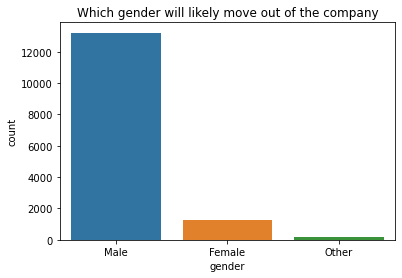

In [9]:
plt.title('Which gender will likely move out of the company')
sns.countplot(data['gender'])
plt.show()

Text(0.5, 1.0, 'Gender percentage looking for new job')

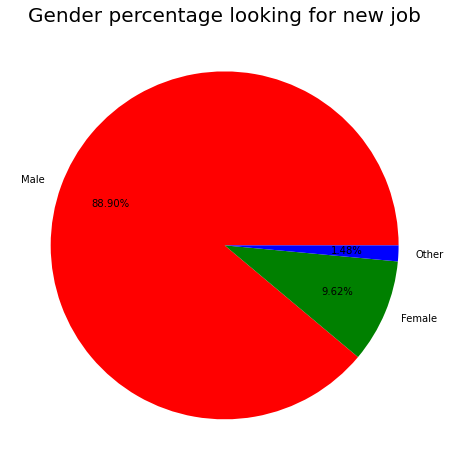

In [10]:
gender = data[data['target'] == 1]['gender']

gender_temp = gender.value_counts()
labels = gender_temp.keys()
bar,ax = plt.subplots(figsize=(8,8))
plt.pie(x = gender_temp, labels = labels , colors = ['red','green','blue'], 
   autopct="%.2f%%",pctdistance=0.7)

plt.title('Gender percentage looking for new job', fontsize=20)

In [11]:
# From which company people are leaving and looking for a job the most

plt.figure(figsize=(8,5))
sns.countplot(data['company_type'])
plt.show()

/Users/francescorota/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'People percentage leaving the company')

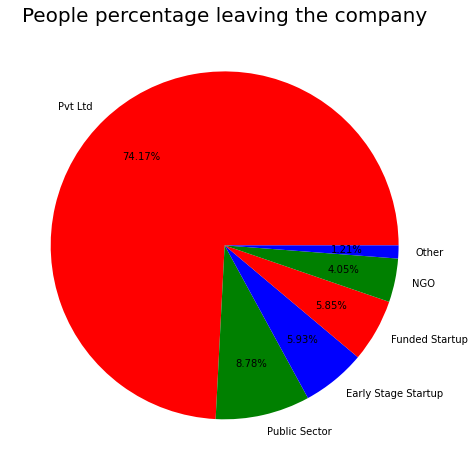

In [12]:
company = data[data['target'] == 1]['company_type']

company_temp = company.value_counts()
labels = company_temp.keys()
bar,ax = plt.subplots(figsize=(8,8))
plt.pie(x = company_temp, labels = labels , colors = ['red','green','blue'], 
   autopct="%.2f%%",pctdistance=0.7)

plt.title('People percentage leaving the company', fontsize=20)

/Users/francescorota/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='relevent_experience', ylabel='count'>

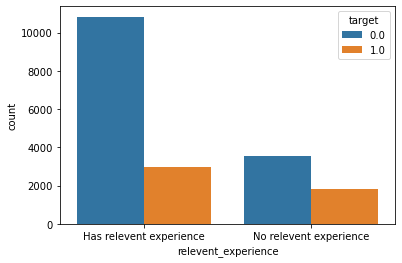

In [13]:
# Relevant Experience
sns.countplot(data['relevent_experience'], hue=data['target'])

/Users/francescorota/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


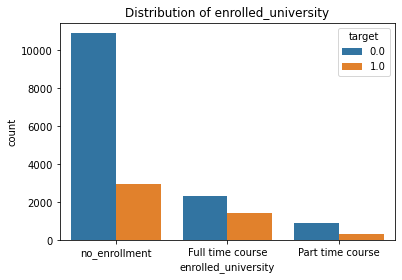

/Users/francescorota/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


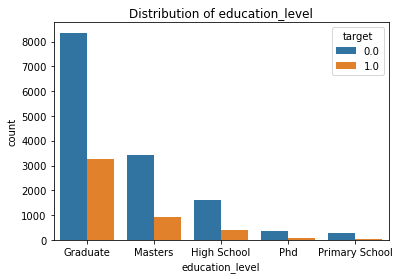

/Users/francescorota/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


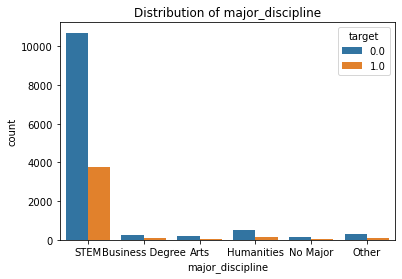

/Users/francescorota/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


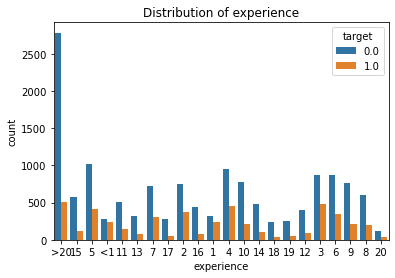

/Users/francescorota/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


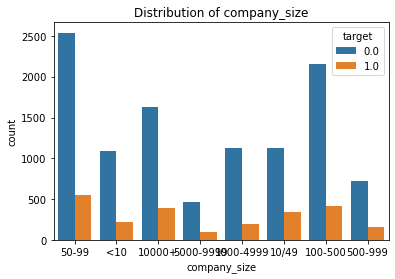

/Users/francescorota/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


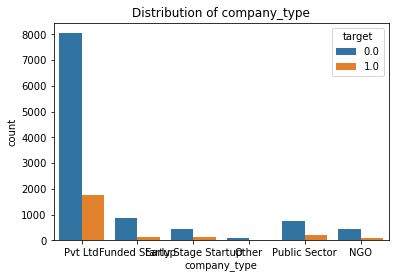

/Users/francescorota/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


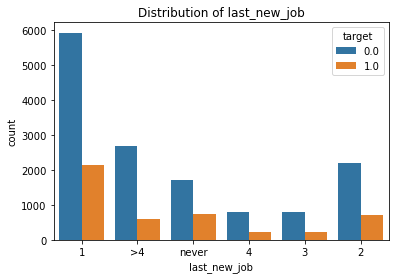

In [14]:
categorical_cols_to_distribute = ['enrolled_university', 'education_level', 'major_discipline', 
                                  'experience', 'company_size', 'company_type', 'last_new_job']

for col in data[categorical_cols_to_distribute]:
    plt.title(f'Distribution of {col}')
    sns.countplot(data[col], hue=data['target'])
    plt.show()

/Users/francescorota/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


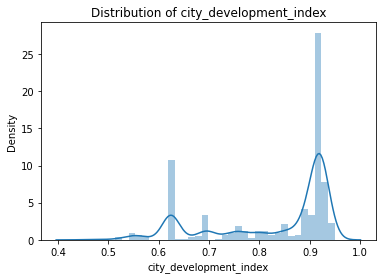

/Users/francescorota/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


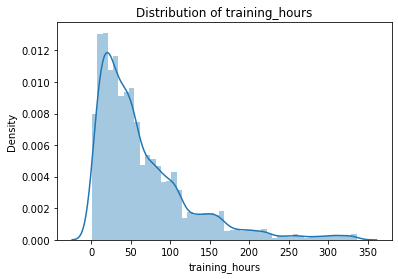

In [15]:
numeric_cols_to_distribute = ['city_development_index', 'training_hours']
for col in data[numeric_cols_to_distribute]:
    plt.title(f'Distribution of {col}')
    sns.distplot(data[col])
    plt.show()

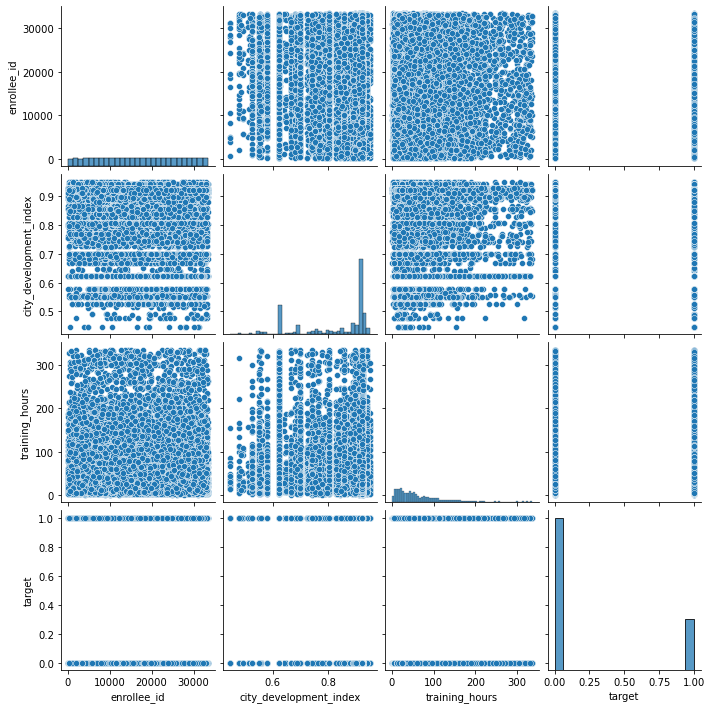

In [16]:
sns.pairplot(data)
plt.show()

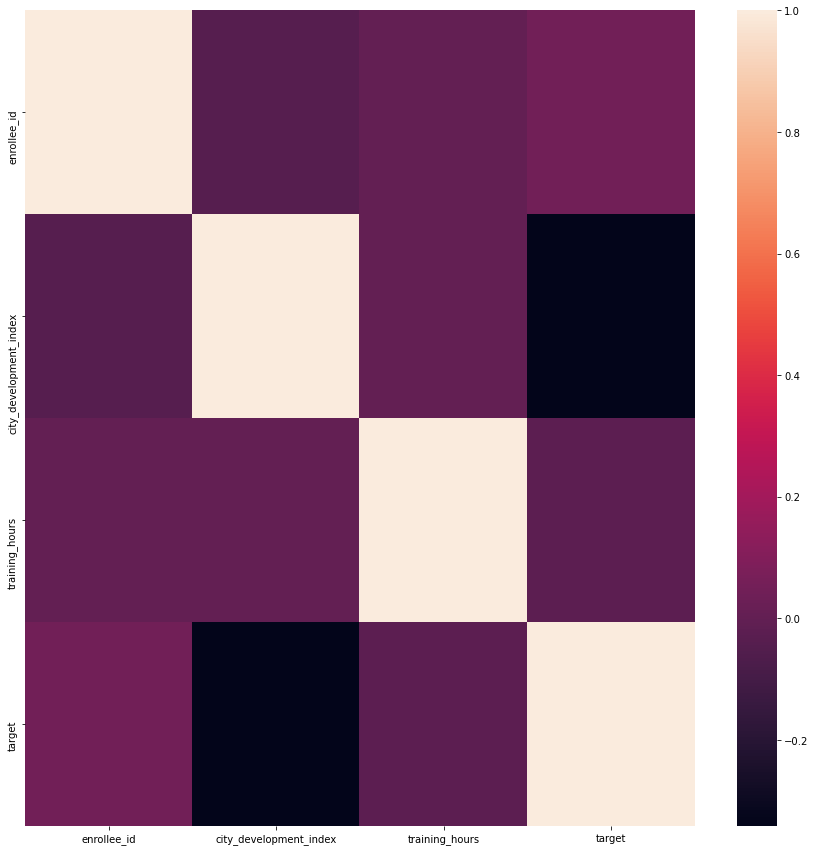

In [17]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr())
plt.show()

# Preprocessing Data

In [18]:
data.isnull().sum()
data = data.dropna()

In [19]:
gender_map = {
        'Female': 2,
        'Male': 1,
        'Other': 0
         }

relevent_experience_map = {
    'Has relevent experience':  1,
    'No relevent experience':    0
}

enrolled_university_map = {
    'no_enrollment'   :  0,
    'Full time course':    1, 
    'Part time course':    2 
}
    
education_level_map = {
    'Primary School' :    0,
    'Graduate'       :    2,
    'Masters'        :    3, 
    'High School'    :    1, 
    'Phd'            :    4
    } 
    
major_map ={ 
    'STEM'                   :    0,
    'Business Degree'        :    1, 
    'Arts'                   :    2, 
    'Humanities'             :    3, 
    'No Major'               :    4, 
    'Other'                  :    5 
}
    
experience_map = {
    '<1'      :    0,
    '1'       :    1, 
    '2'       :    2, 
    '3'       :    3, 
    '4'       :    4, 
    '5'       :    5,
    '6'       :    6,
    '7'       :    7,
    '8'       :    8, 
    '9'       :    9, 
    '10'      :    10, 
    '11'      :    11,
    '12'      :    12,
    '13'      :    13, 
    '14'      :    14, 
    '15'      :    15, 
    '16'      :    16,
    '17'      :    17,
    '18'      :    18,
    '19'      :    19, 
    '20'      :    20, 
    '>20'     :    21
} 
    
company_type_map = {
    'Pvt Ltd'               :    0,
    'Funded Startup'        :    1, 
    'Early Stage Startup'   :    2, 
    'Other'                 :    3, 
    'Public Sector'         :    4, 
    'NGO'                   :    5
}

company_size_map = {
    '<10'          :    0,
    '10/49'        :    1, 
    '100-500'      :    2, 
    '1000-4999'    :    3, 
    '10000+'       :    4, 
    '50-99'        :    5, 
    '500-999'      :    6, 
    '5000-9999'    :    7
}
    
last_new_job_map = {
    'never'        :    0,
    '1'            :    1, 
    '2'            :    2, 
    '3'            :    3, 
    '4'            :    4, 
    '>4'           :    5
}

In [20]:
data.loc[:,'education_level'] = data['education_level'].map(education_level_map)
data.loc[:,'company_size'] = data['company_size'].map(company_size_map)
data.loc[:,'company_type'] = data['company_type'].map(company_type_map)
data.loc[:,'last_new_job'] = data['last_new_job'].map(last_new_job_map)
data.loc[:,'major_discipline'] = data['major_discipline'].map(major_map)
data.loc[:,'enrolled_university'] = data['enrolled_university'].map(enrolled_university_map)
data.loc[:,'relevent_experience'] = data['relevent_experience'].map(relevent_experience_map)
data.loc[:,'gender'] = data['gender'].map(gender_map)
data.loc[:,'experience'] = data['experience'].map(experience_map)

# encoding city feature using label encoder
lb_en = LabelEncoder()

data.loc[:,'city'] = lb_en.fit_transform(data.loc[:,'city']) 

In [21]:
train = data[['city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours']]

In [22]:
target = data[['target']]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.35, random_state=101)

In [24]:
X_train

city  city_development_index  gender  relevent_experience  \
17325    60                   0.624       1                    1   
10606    66                   0.939       1                    1   
4247     60                   0.624       1                    1   
1596      5                   0.920       1                    1   
6723      1                   0.895       1                    1   
...     ...                     ...     ...                  ...   
1277     60                   0.624       1                    1   
12128   115                   0.915       1                    1   
17137     5                   0.920       1                    1   
2842     86                   0.913       1                    1   
3221     81                   0.740       1                    1   

       enrolled_university  education_level  major_discipline  experience  \
17325                    0                2                 0           6   
10606                    0                2                 0          14   
4247                     0                3                 0           0   
1596                     0                3                 0          21   
6723                     0                3                 0           3   
...                    ...              ...               ...         ...   
1277                     0                2                 0           3   
12128                    0                2                 0           9   
17137                    0                3                 0          21   
2842                     0                2                 0          21   
3221                     0                2                 0          14   

       company_size  company_type  last_new_job  training_hours  
17325             4             0             1              13  
10606             3             0             5             112  
4247              2             0             1              30  
1596              4             0             5              33  
6723              1             1             1              14  
...             ...           ...           ...             ...  
1277              4             0             1              19  
12128             5             0             2              55  
17137             2             0             1               5  
2842              0             0             5              20  
3221              2             0             4              84  

[5820 rows x 12 columns]

In [25]:
y_train

target
17325     0.0
10606     0.0
4247      1.0
1596      1.0
6723      0.0
...       ...
1277      1.0
12128     0.0
17137     0.0
2842      0.0
3221      0.0

[5820 rows x 1 columns]

# Model Training and Accuracy

## XGBClassifier

In [26]:
model = XGBClassifier()
model.fit(X_train, y_train)

/Users/francescorota/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier()

In [48]:
pred_XGB = model.predict(X_test)
pred_XGB_prob = model.predict_proba(X_test)
pred

array([1., 0., 0., ..., 0., 0., 0.])

In [28]:
model.score(X_test, y_test)

0.856140350877193

## Naive bayes

In [29]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

/Users/francescorota/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [49]:
pred_nb = model_nb.predict(X_test)
pred_NB_prob = model_nb.predict_proba(X_test)
pred_nb

array([1., 0., 0., ..., 0., 0., 0.])

In [31]:
model_nb.score(X_test, y_test)

0.8325358851674641

## SVC

In [56]:
model_svc = SVC(kernel = "poly", probability=True)
model_svc.fit(X_train, y_train)

/Users/francescorota/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='poly', probability=True)

In [57]:
pred_svc = model_svc.predict(X_test)
pred_svc_prob = model_svc.predict_proba(X_test)
pred_svc

array([0., 0., 0., ..., 0., 0., 0.])

In [58]:
model_svc.score(X_test, y_test)

0.8370015948963317

## Random Forest

In [35]:
model_rf = RandomForestClassifier(n_estimators=50, random_state=1, n_jobs=-1)
model_rf.fit(X_train, y_train)

/Users/francescorota/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=1)

In [54]:
pred_rf = model_rf.predict(X_test)
pred_RF_prob = model_rf.predict_proba(X_test)
pred_rf

array([1., 0., 0., ..., 0., 0., 0.])

In [37]:
model_rf.score(X_test, y_test)

0.8507177033492823

## Ensemble

In [61]:
model_voting = VotingClassifier(
    estimators=[
        ('rf', model_rf),
        ('svc', model_svc),
        ('gnb', model_nb),
        ('xgb', model),
    ],voting='soft')

In [62]:
pipe = make_pipeline(
    SimpleImputer(),
    model_voting
)

In [63]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
y_pred_prob = pipe.predict_proba(X_test)

/Users/francescorota/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [64]:
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [65]:
print ("Accuracy is: ", (accuracy_score(y_test, y_pred)*100).round(2))
pipe.score(X_test, y_test)

Accuracy is:  85.33


0.8532695374800638

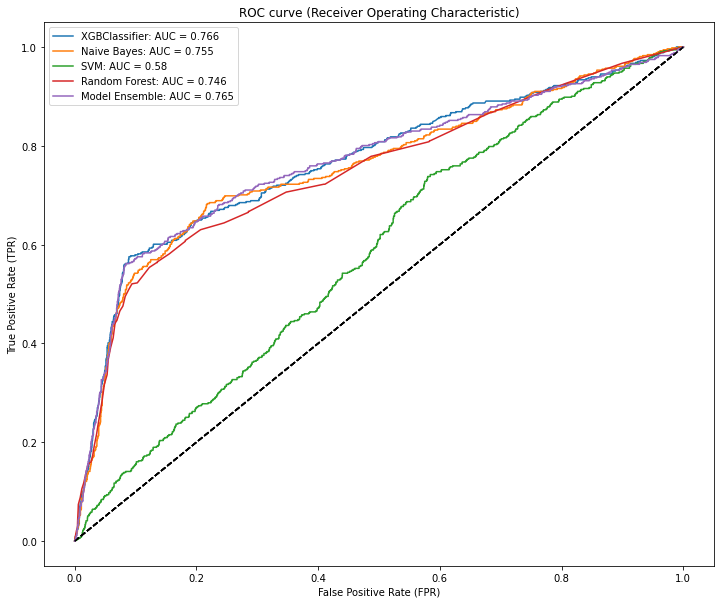

In [66]:
plt.figure(figsize=(12,10))

for test, pred, name in zip([y_test, y_test, y_test, y_test, y_test], [pred_XGB_prob[:,1], pred_NB_prob[:,1], pred_svc_prob[:,1], pred_RF_prob[:,1], y_pred_prob[:,1]], ['XGBClassifier', 'Naive Bayes','SVM', 'Random Forest','Model Ensemble']):
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc='best')
    plt.plot([0,1],[0,1],color='black', linestyle='--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()